In [8]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plot

In [9]:
df = pd.read_csv('vgsales_6.csv')
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,13353,Black & Bruised,GC,2003.0,Fighting,Vivendi Games,0.04,0.01,0.00,0.00,0.05
1,11530,Tempest 3X,PS,1995.0,Shooter,Interplay,0.04,0.03,0.00,0.01,0.08
2,4217,We Sing Encore,Wii,2010.0,Misc,Nordic Games,0.00,0.41,0.00,0.06,0.47
3,3796,Spider-Man,N64,2000.0,Action,Activision,0.43,0.09,0.00,0.01,0.53
4,58,Super Mario All-Stars,SNES,1993.0,Platform,Nintendo,5.99,2.15,2.12,0.29,10.55
...,...,...,...,...,...,...,...,...,...,...,...
548,3345,NBA 2K8,PS2,2007.0,Sports,Take-Two Interactive,0.50,0.02,0.00,0.08,0.60
549,4948,Marvel: Ultimate Alliance,PS3,2006.0,Role-Playing,Activision,0.33,0.02,0.00,0.04,0.39
550,10150,The Fairly Odd Parents: Breakin Da Rules,XB,2003.0,Platform,THQ,0.08,0.02,0.00,0.00,0.11
551,16584,Fit & Fun,Wii,2011.0,Sports,Unknown,0.00,0.01,0.00,0.00,0.01


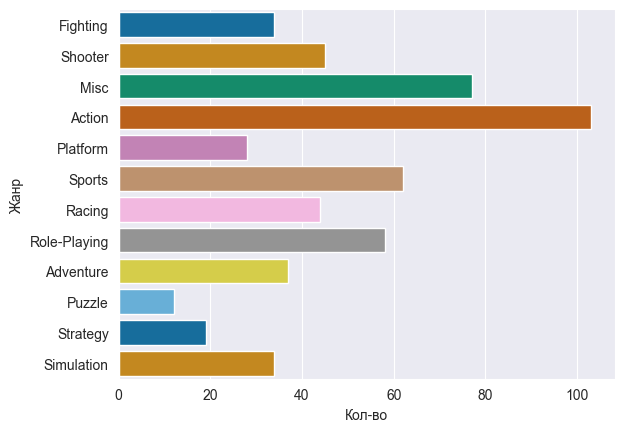

In [10]:
sns.set_style('darkgrid')
sns.countplot(y='Genre', data=df, palette='colorblind')
plot.xlabel('Кол-во')
plot.ylabel('Жанр')
plot.show()

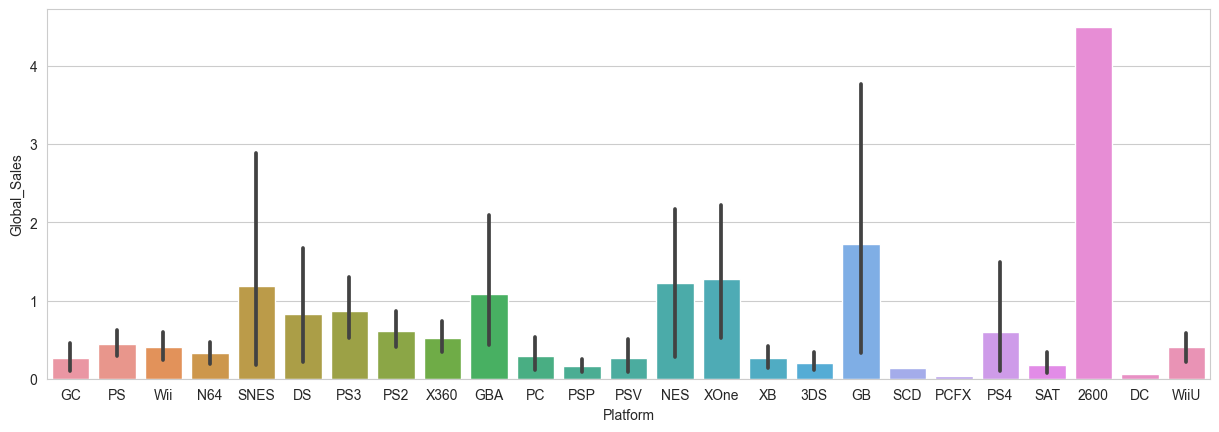

In [11]:
sns.set_style('whitegrid')
graph = sns.barplot(x=df["Platform"], y=df["Global_Sales"])
graph.figure.set_figwidth(15)

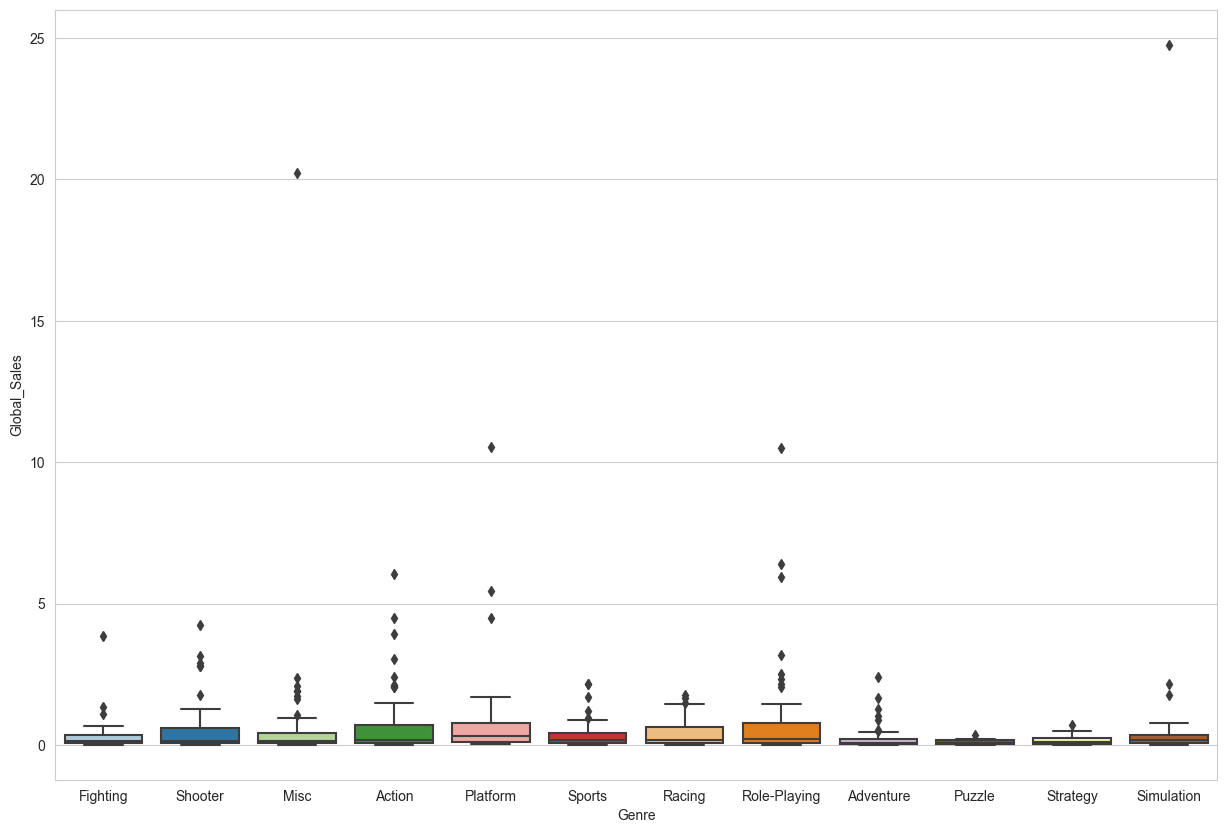

In [12]:
graph = sns.boxplot(x="Genre", y="Global_Sales", data=df, palette='Paired')
graph.figure.set_figwidth(15)
graph.figure.set_figheight(10)

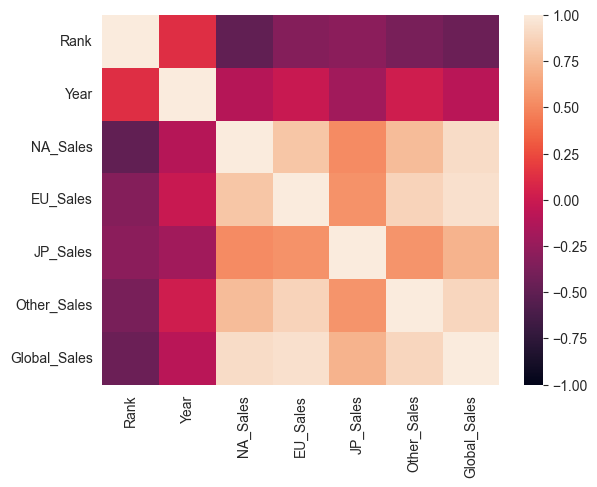

In [15]:
HeatMap = sns.heatmap(df.corr(numeric_only=True), vmin=-1, vmax=1)

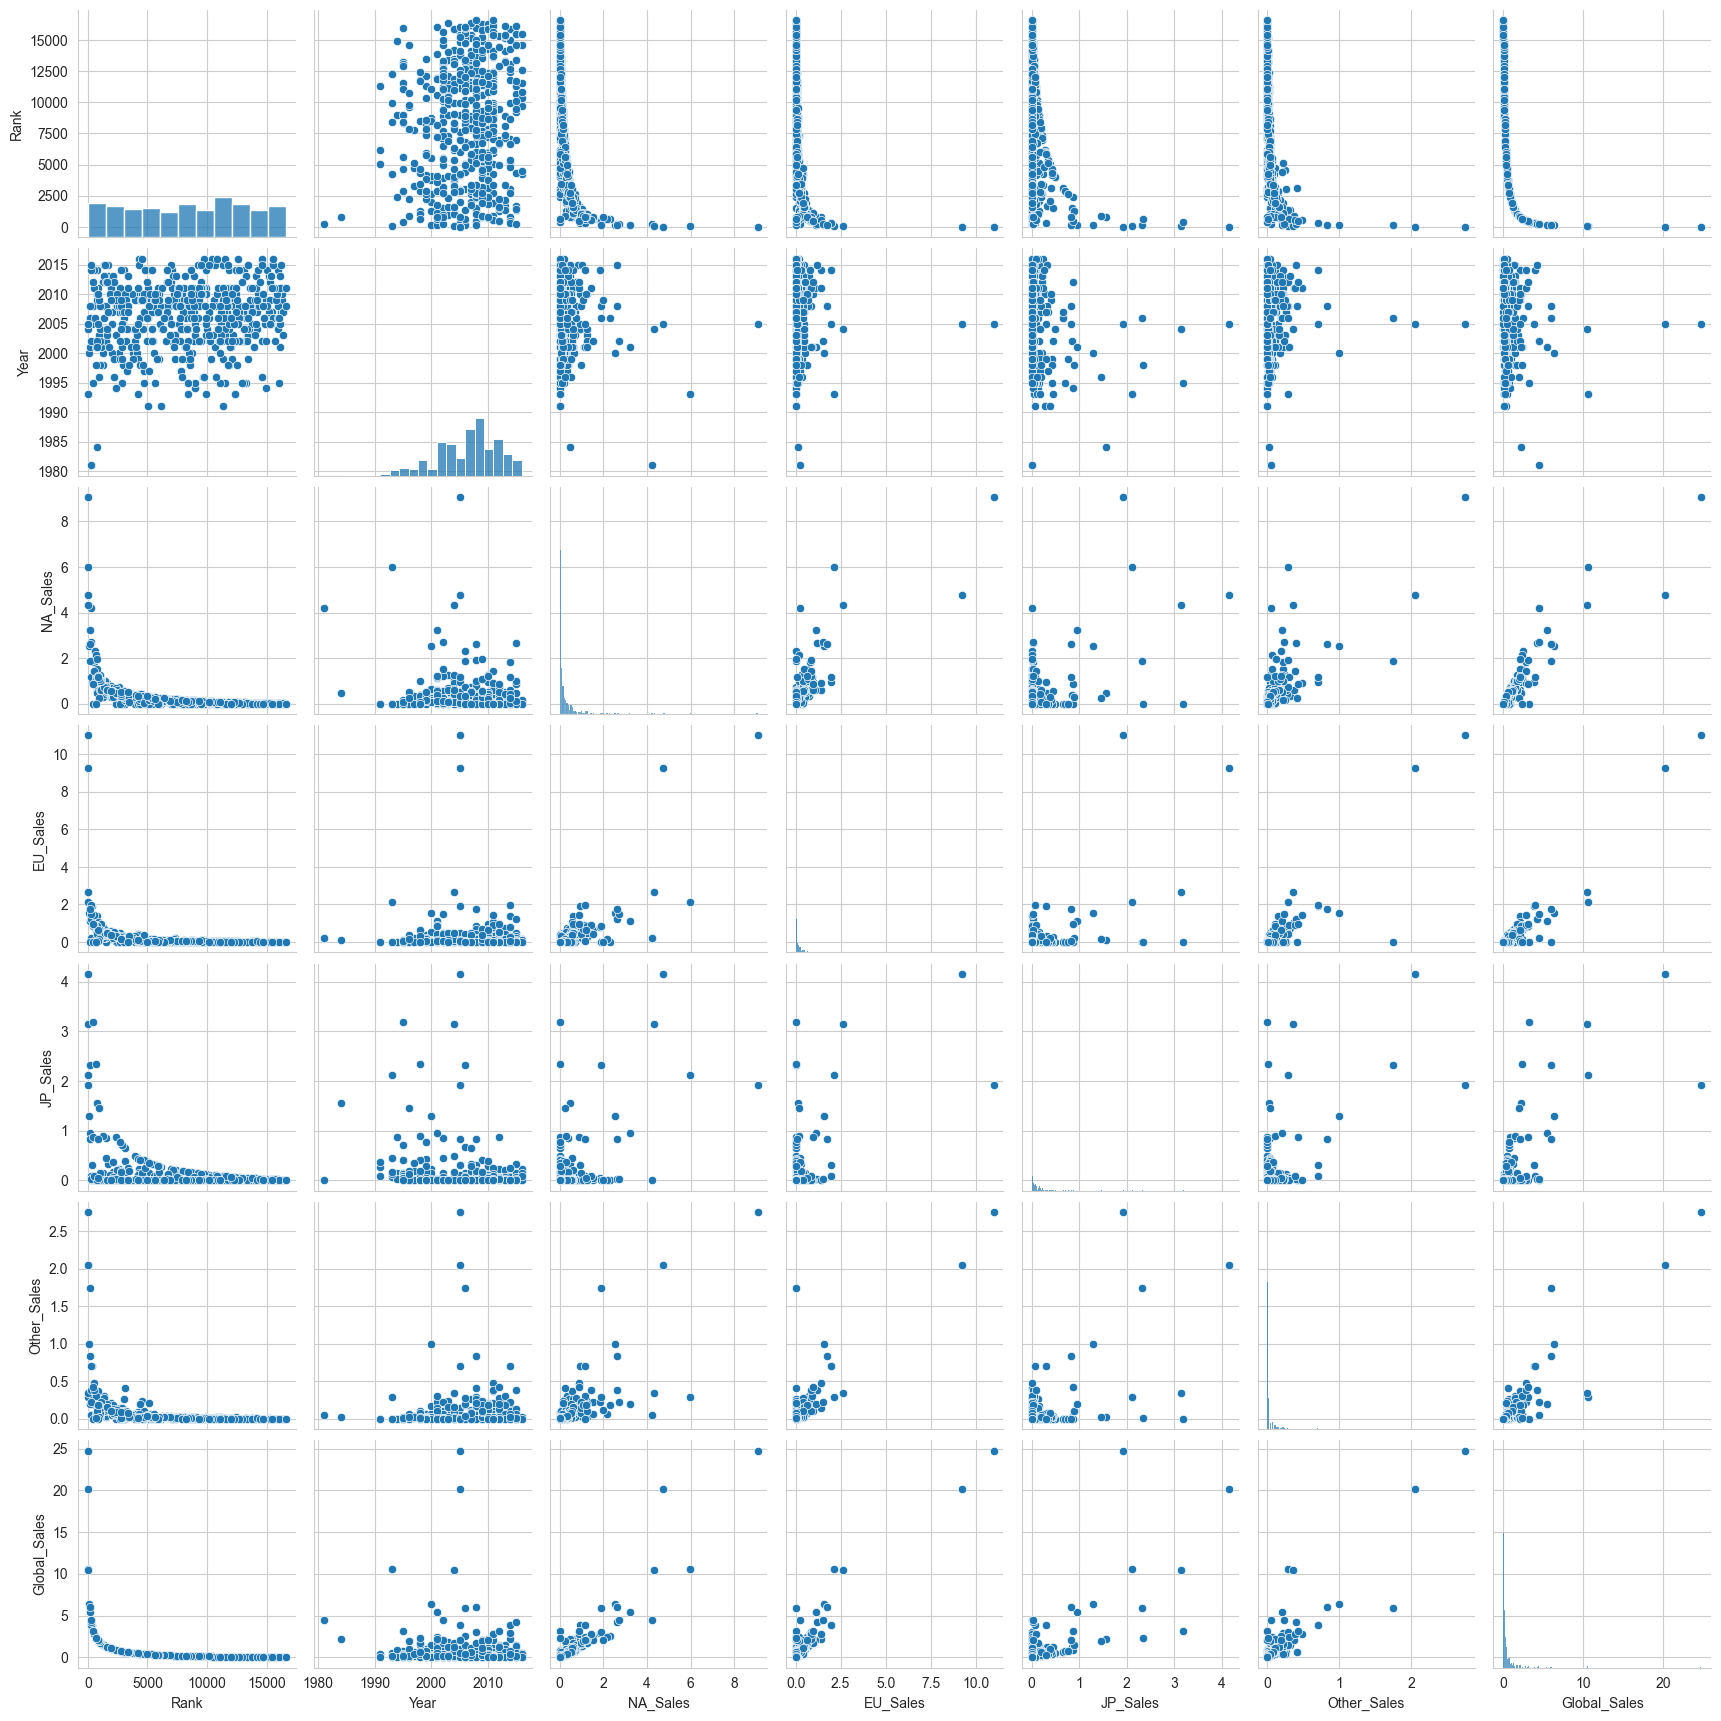

In [16]:
pair = sns.pairplot(df)

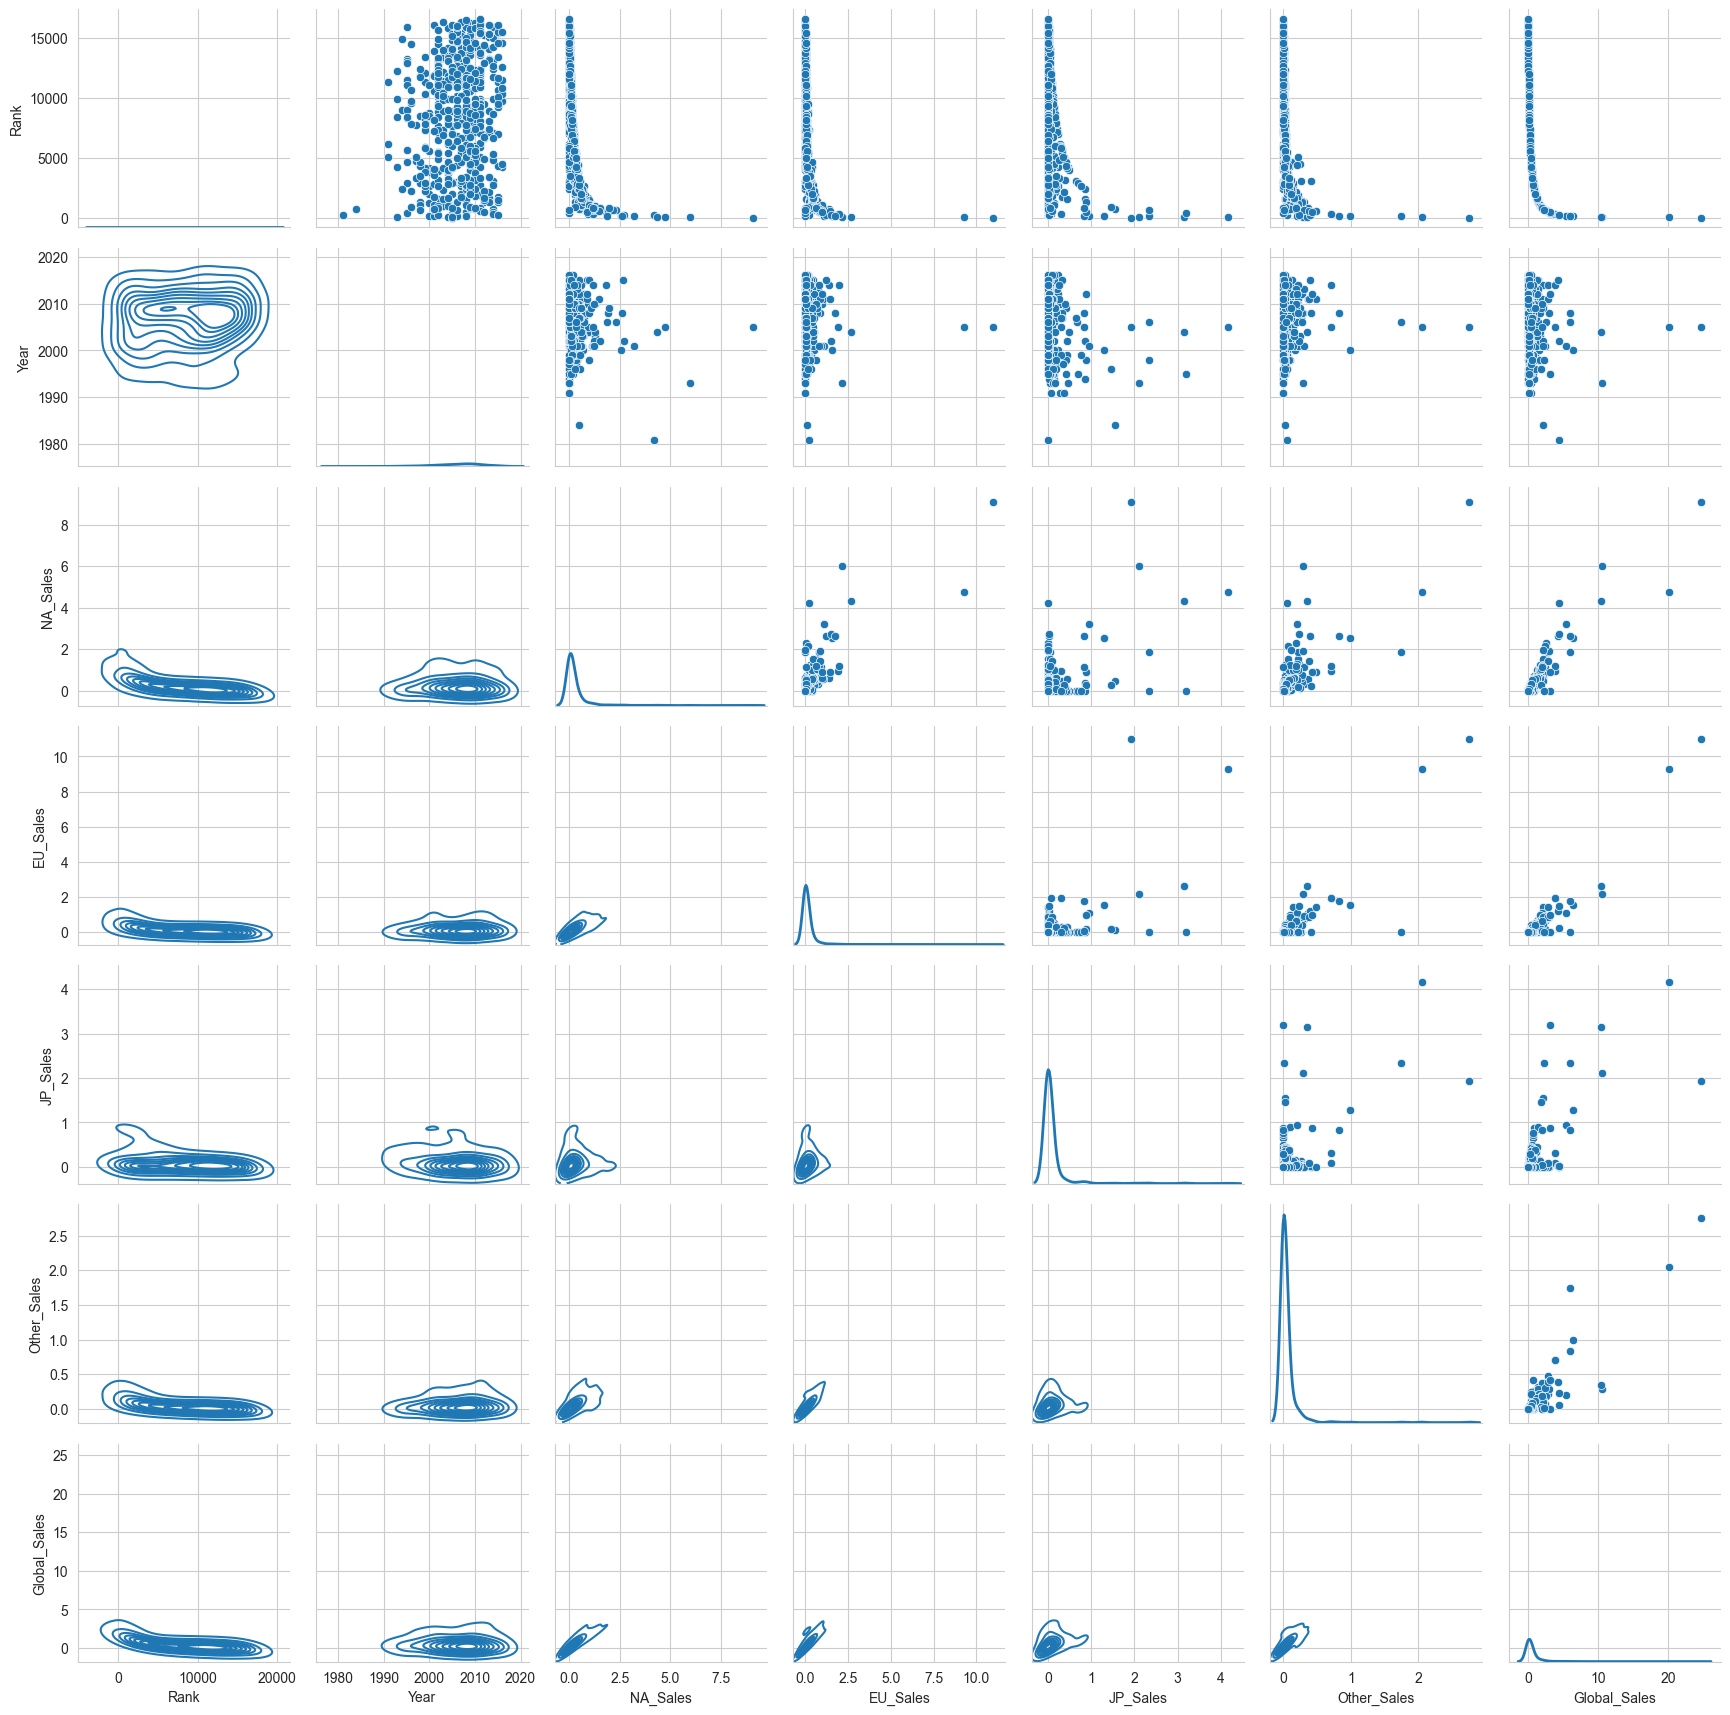

In [17]:
pair_grid = sns.PairGrid(df)
pair_grid.map_upper(sns.scatterplot)
pair_grid.map_lower(sns.kdeplot)
pair_grid.map_diag(sns.kdeplot, lw =2)

In [18]:
df_mini = df[["Rank", "Year", "Other_Sales"]][::100]
df_mini

,Rank,Year,Other_Sales
0,13353,2003.0,0.00
100,11722,2008.0,0.00
200,2381,1994.0,0.00
300,9875,2003.0,0.02
400,534,2011.0,0.48
500,12680,2014.0,0.00


In [19]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)
model.fit(df_mini)
all_predictions = model.predict(df_mini)
df_mini["KMeans"] = all_predictions
df_mini

C:\Users\kiruk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Rank,Year,Other_Sales,KMeans
0,13353,2003.0,0.00,1
100,11722,2008.0,0.00,1
200,2381,1994.0,0.00,0
300,9875,2003.0,0.02,2
400,534,2011.0,0.48,0
500,12680,2014.0,0.00,1


<Axes: xlabel='count', ylabel='KMeans'>

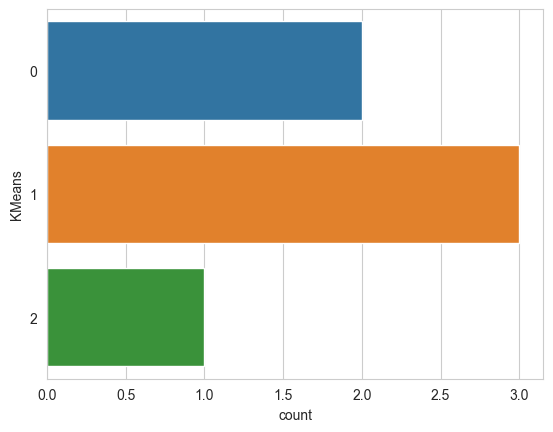

In [20]:
sns.countplot(data = df_mini, y="KMeans")

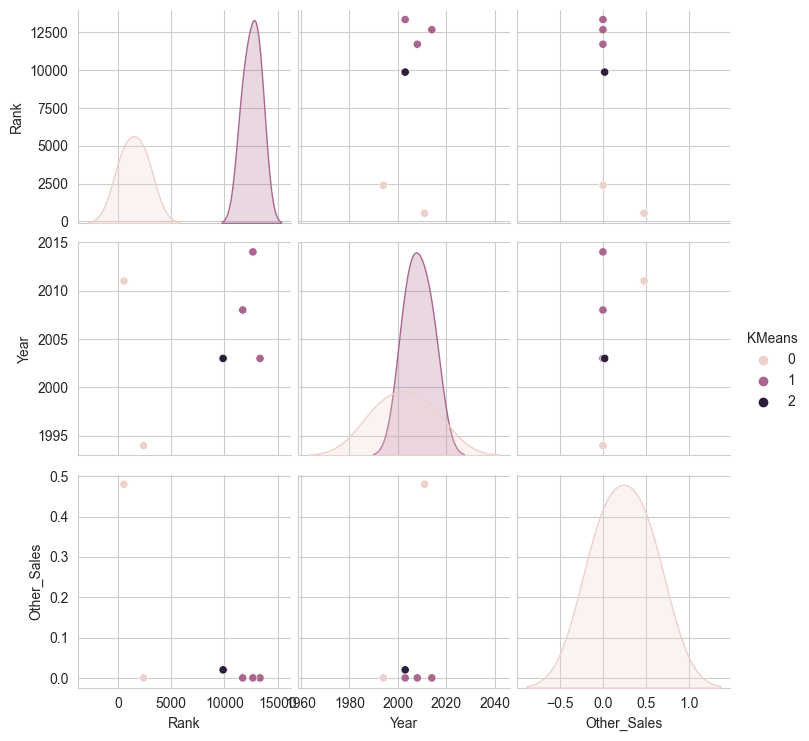

In [21]:
sns.pairplot(df_mini, hue="KMeans")